
## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [3]:
# Import basic libraries
import numpy as np 
import pandas as pd

In [4]:
# Load the data
data = pd.read_csv('UCI_Credit_Card.csv',index_col = 'ID')

In [5]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

## Data Cleaning
* No missing data, but there are a few anamolous things
* Variable name: 1) PAY_0 is very confusing, should be changed to PAY_1 in consistensy with other variable names 2) Change target variable name from 'default.pay.next.month' to 'def_pay'
* Understand categorical and numerical data respectively


In [7]:
# Change variable name
data = data.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

In [8]:
# Change data type from numeric to categorical
data['SEX'] = data['SEX'].astype(str)
data['EDUCATION'] = data['EDUCATION'].astype(str)
data['MARRIAGE'] = data['MARRIAGE'].astype(str)
data['def_pay'] = data['def_pay'].astype(str)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
def_pay      30000 non-null object
dtypes: float64(13), int64(7), object(4)
memo

In [10]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
# To have a general idea of the default probability
data['def_pay'].value_counts() ['1']/data['def_pay'].count()

0.2212

In [12]:
# Categorical variables
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* EDUCATION has cathegory 5 and 6 that both are 'unknown', moreover it has a label 0 that is undocumented.

In [14]:
# The 0 (undocumented label), 5 and 6 ('unknown' label) in EDUCATION can also be put in a 'Other' (thus 4)
data['EDUCATION'] = data['EDUCATION'].replace('0','4')
data['EDUCATION'] = data['EDUCATION'].replace('5','4')
data['EDUCATION'] = data['EDUCATION'].replace('6','4')

data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* MARRIAGE has a label 0 that is undocumented.

In [16]:
# The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3)
data['MARRIAGE'] = data['MARRIAGE'].replace('0','3') 
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

One might wonder what these labels might mean something.

"Other" in education can be an education lower than the high school level.

"Other" in marriage could be, for example, "divorced". 


## Data visualization

In [17]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

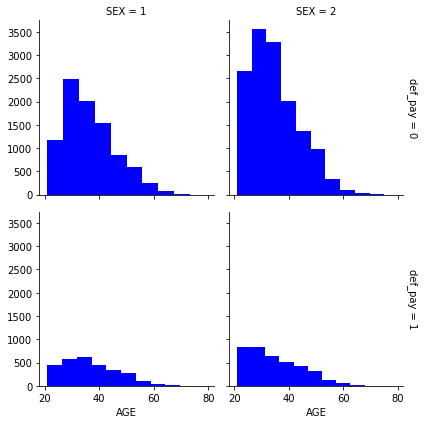

In [18]:
# histogram for categorical variables
g = sns.FacetGrid(data, col='SEX', row='def_pay', margin_titles=True)
g.map(plt.hist,'AGE',color='blue')

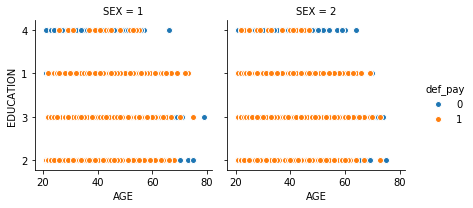

In [19]:
g = sns.FacetGrid(data, hue='def_pay', col='SEX', margin_titles=True)
g=g.map(plt.scatter, 'AGE', 'EDUCATION',edgecolor='w').add_legend()

In [20]:
# histogram for numerical variables
# Payment delay
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


* PAY_X has labels -2 and -1 that are undocumented. If 1,2,3, etc are the months of delay and 0 is labeled as 'pay duly', then  every negative value should be seen as 0

In [21]:
fil = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[fil, 'PAY_1'] = 0
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_5'] = 0
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001411EDF1A48>,
      dtype=object)

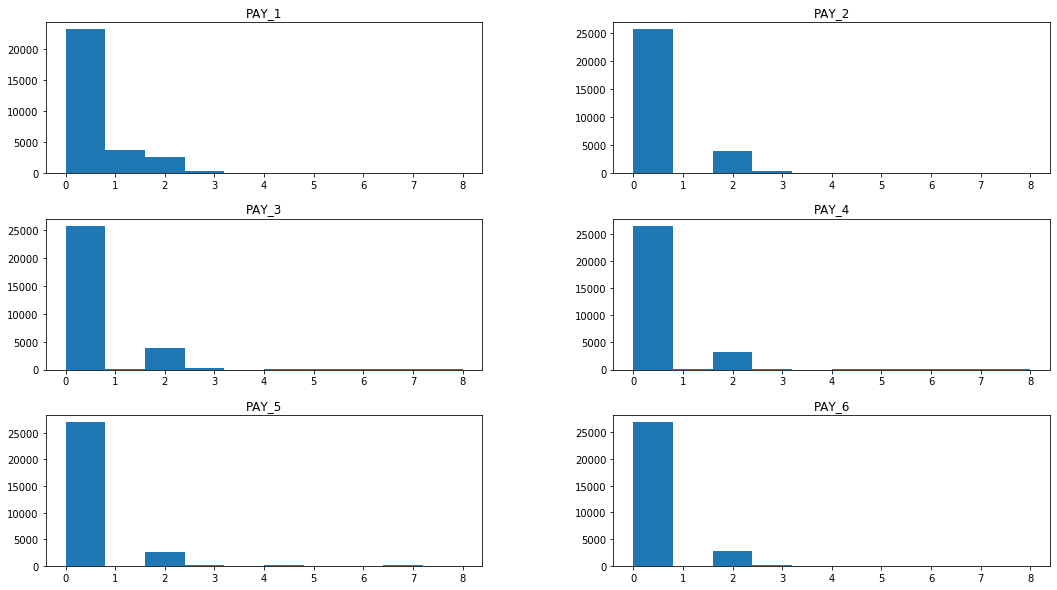

In [22]:
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].hist(bins=10,figsize=(18,10),grid=False)

In [23]:
# Bill statement 
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001411E370CC8>,
      dtype=object)

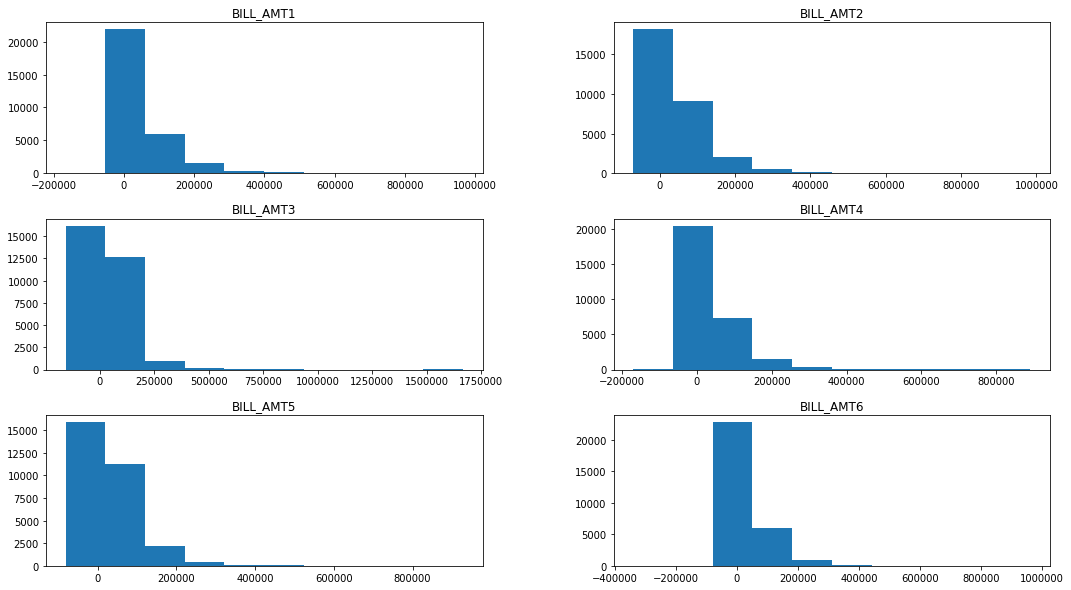

In [24]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].hist(bins=10,figsize=(18,10),grid=False)

* Negative values of bill statement can be interpreted as credit? 

In [25]:
#Previous payment
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001411E6BEC48>,
      dtype=object)

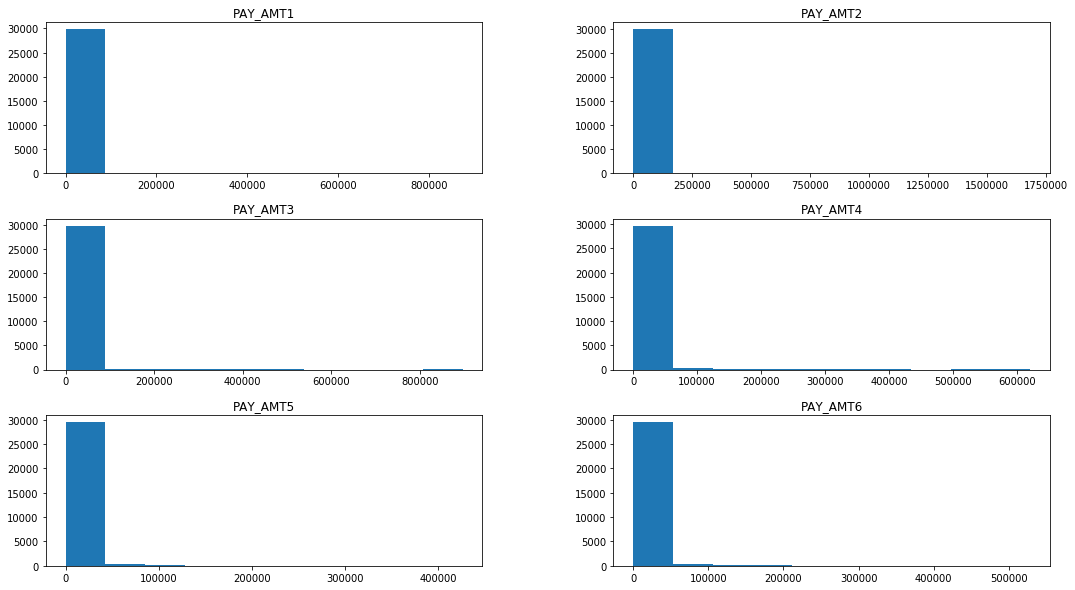

In [26]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].hist(bins=10,figsize=(18,10),grid=False)

In [27]:
data[['LIMIT_BAL']].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001411ECBCD08>]],
      dtype=object)

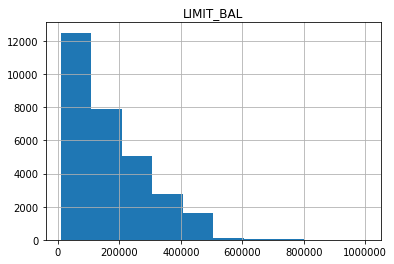

In [28]:
data[['LIMIT_BAL']].hist()

* The range is very broad. Will cluster the data in a narrower range.

In [29]:
data['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

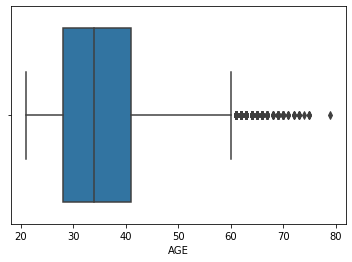

In [30]:
# boxplot for AGE 
ax = sns.boxplot(data['AGE'])

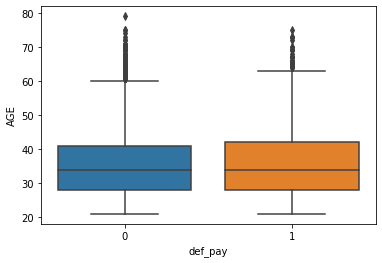

In [31]:
# boxplot for AGE regarding Default
bx = sns.boxplot(x = data['def_pay'], y = data['AGE'])

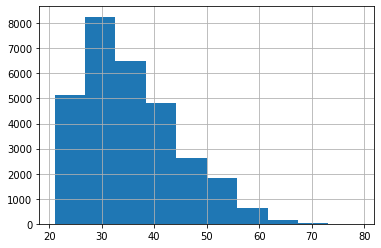

In [32]:
# histogram for Age
data['AGE'].hist()

## Decision Tree Model

In [33]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
# define independent variables / attirbutes / features
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# define one single target variable / label
target = ['def_pay']

In [36]:
# get defined training dataset
x = data[features]
y = data[target]

In [37]:
# define our model decision tree model
model = DecisionTreeClassifier()

In [38]:
# build the decisio tree model based on defalut hyperparameter settings
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
model.get_depth()

43

In [40]:
model.get_n_leaves()

4797

### Cross Validation

In [41]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
score_cv = cross_val_score(model, x, y, cv=10)

In [44]:
score_cv

array([0.71509497, 0.71609464, 0.71609464, 0.71876041, 0.72066667,
       0.727     , 0.73824608, 0.7429143 , 0.72890964, 0.72724241])

In [45]:
score_cv.mean()

0.7251023755928565

In [46]:
# make an array of depths to choose from, say 1 to 20
depths = [5,10,15,20,25,30,35,40]
depths

[5, 10, 15, 20, 25, 30, 35, 40]

In [47]:
# define the number to try out for max leaf nodes 
num_leafs = [500,1000,1500,2000,2500,3000,3500,4000,4500]
num_leafs

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

In [48]:
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]

In [49]:
# define Model using GridSearchCV
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)

In [50]:
DTM.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                          'max_leaf_nodes': [500, 1000, 1500, 2

In [51]:
# find the best parameters
DTM.best_params_

{'max_depth': 5, 'max_leaf_nodes': 2500}

In [52]:
DTM.best_score_

0.8200666666666667

In [53]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 500, max_depth = 5)

In [54]:
my_model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=500,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
DTM_pred = my_model.predict(x)

## Logistics Regression Model

In [116]:
from sklearn import preprocessing

In [117]:
# Normalize attributes
zscore_scaler = preprocessing.StandardScaler().fit(x)
X_transform = pd.DataFrame(zscore_scaler.transform(x), columns = x.columns)

In [118]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,0,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,0,0,0,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [119]:
X_transform.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,2.160496,2.095469,-0.384614,-0.33999,-0.308621,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.469071,2.095469,-0.384614,-0.33999,-0.308621,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [120]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [121]:
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')

In [122]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
# change target column to array
yact = y.values.ravel()

In [124]:
score_cv2 = cross_val_score(lr, X_transform, yact, cv=10)

C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [125]:
# accuracy from cross validation
score_cv2

array([0.80439853, 0.80639787, 0.81006331, 0.80673109, 0.82066667,
       0.82833333, 0.82927643, 0.82627543, 0.82594198, 0.82194065])

In [126]:
score_cv2.mean()

0.8180025281225032

In [127]:
#predict value of target based on cross validation
LR_pred = cross_val_predict(lr, X_transform, yact, cv=10)

C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\zcach\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

## Model Evaluation

In [128]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

### Decision tree

In [129]:
# Confusion matrix
print("Confusion Matrix:", '\n',confusion_matrix(y, DTM_pred))
print("Accuracy:",accuracy_score(y, DTM_pred, normalize=True, sample_weight=None))

Confusion Matrix: 
 [[22356  1008]
 [ 4266  2370]]
Accuracy: 0.8242


In [130]:
print(classification_report(y, DTM_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89     23364
           1       0.70      0.36      0.47      6636

    accuracy                           0.82     30000
   macro avg       0.77      0.66      0.68     30000
weighted avg       0.81      0.82      0.80     30000



### Logistics regression

In [131]:
# Confusion matrix
print("Confusion Matrix:", '\n',confusion_matrix(y, LR_pred))
print("Accuracy:",accuracy_score(y, LR_pred, normalize=True, sample_weight=None))

Confusion Matrix: 
 [[22346  1018]
 [ 4442  2194]]
Accuracy: 0.818


In [132]:
print(classification_report(y, LR_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     23364
           1       0.68      0.33      0.45      6636

    accuracy                           0.82     30000
   macro avg       0.76      0.64      0.67     30000
weighted avg       0.80      0.82      0.79     30000

